## Trending Top 7 Data Roles in the US 

In [ ]:
# Import all the necessary Library

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


# Data Cleanup form a strings to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Procedures
1.  Filter the dataframe for United States and drop the NaN values for the Average Salary Year Column  
  
2.  Create a new column of job_posted_month from the job_posted_date column
3.  Create a pivot table from the job_posted_month(index) and job_title_short(columns), with its value of salary_year_avg
4.  Sort the values from highest to lowest
5.  Change the index from numbers of month to Month Name(Ex:Jan, Feb, Mar, etc ) by resetting the index
6.  Plot the pivot tables 
7.  Customization of the Pivot Tables 

## Codes

In [27]:
df_US = df[df['job_country'] == 'United States'].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

df_US['job_posted_month_no'] = df_US['job_posted_date'].dt.month

# There are some NaN values for the pivot tables because that section doesn't exist. 
df_US_pivot = df_US.pivot_table(index='job_posted_month_no', columns='job_title_short',values='salary_year_avg',aggfunc='mean')

df_US_pivot.loc['Total'] = df_US_pivot.sum()

df_US_pivot = df_US_pivot[df_US_pivot.loc['Total'].sort_values(ascending=False).index]  # sorted the total values with its index

df_US_pivot = df_US_pivot.drop('Total')

df_US_pivot

job_title_short,Senior Data Scientist,Machine Learning Engineer,Senior Data Engineer,Data Scientist,Software Engineer,Data Engineer,Senior Data Analyst,Cloud Engineer,Business Analyst,Data Analyst
job_posted_month_no,,,,,,,,,,
1,163721.490000,137125.607143,157380.011765,142624.539794,108990.285714,137509.215340,114642.507156,NaN,98009.086957,92911.604638
2,151673.768182,141864.500000,147233.321429,136834.625061,153653.000000,132745.026431,108712.759740,127733.333333,111581.521739,95203.794687
3,153905.642815,158215.000000,149139.269841,135938.916874,160673.125000,134568.497733,110640.337457,151000.000000,93288.185185,95826.978737
4,158462.724826,140396.428571,154451.178161,137204.623197,154928.571429,137193.465763,114346.355337,157650.000000,97827.428571,95884.349035
5,152986.470000,199250.000000,159674.257143,140916.010089,141097.166667,132909.650140,117424.893133,151000.000000,104991.937500,94981.292934
6,158877.694853,158198.090909,145602.184000,140576.400900,118890.466667,131972.622899,123843.570114,66000.000000,102694.851852,98733.739366
7,162811.472842,154893.153846,147254.569620,142409.442777,139344.043478,132148.347898,116598.046969,131250.000000,95068.088976,100604.257492
8,161436.590753,137212.272727,140184.366279,146819.050773,140275.866667,129623.596774,114420.468750,114641.333333,99264.571429,98871.445553
9,159024.538942,177330.875000,151349.062078,142396.798165,102460.628348,137256.224836,114299.080625,92866.666667,88217.072727,91987.472701


In [ ]:
# Change the index to Month Name
df_US_pivot = df_US_pivot.reset_index()
df_US_pivot['job_posted_month'] = df_US_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_US_pivot = df_US_pivot.set_index('job_posted_month')
df_US_pivot = df_US_pivot.drop(columns='job_posted_month_no')

df_US_pivot

job_title_short,Senior Data Scientist,Machine Learning Engineer,Senior Data Engineer,Data Scientist,Software Engineer,Data Engineer,Senior Data Analyst,Cloud Engineer,Business Analyst,Data Analyst
job_posted_month,,,,,,,,,,
Jan,163721.490000,137125.607143,157380.011765,142624.539794,108990.285714,137509.215340,114642.507156,NaN,98009.086957,92911.604638
Feb,151673.768182,141864.500000,147233.321429,136834.625061,153653.000000,132745.026431,108712.759740,127733.333333,111581.521739,95203.794687
Mar,153905.642815,158215.000000,149139.269841,135938.916874,160673.125000,134568.497733,110640.337457,151000.000000,93288.185185,95826.978737
Apr,158462.724826,140396.428571,154451.178161,137204.623197,154928.571429,137193.465763,114346.355337,157650.000000,97827.428571,95884.349035
May,152986.470000,199250.000000,159674.257143,140916.010089,141097.166667,132909.650140,117424.893133,151000.000000,104991.937500,94981.292934
Jun,158877.694853,158198.090909,145602.184000,140576.400900,118890.466667,131972.622899,123843.570114,66000.000000,102694.851852,98733.739366
Jul,162811.472842,154893.153846,147254.569620,142409.442777,139344.043478,132148.347898,116598.046969,131250.000000,95068.088976,100604.257492
Aug,161436.590753,137212.272727,140184.366279,146819.050773,140275.866667,129623.596774,114420.468750,114641.333333,99264.571429,98871.445553
Sep,159024.538942,177330.875000,151349.062078,142396.798165,102460.628348,137256.224836,114299.080625,92866.666667,88217.072727,91987.472701


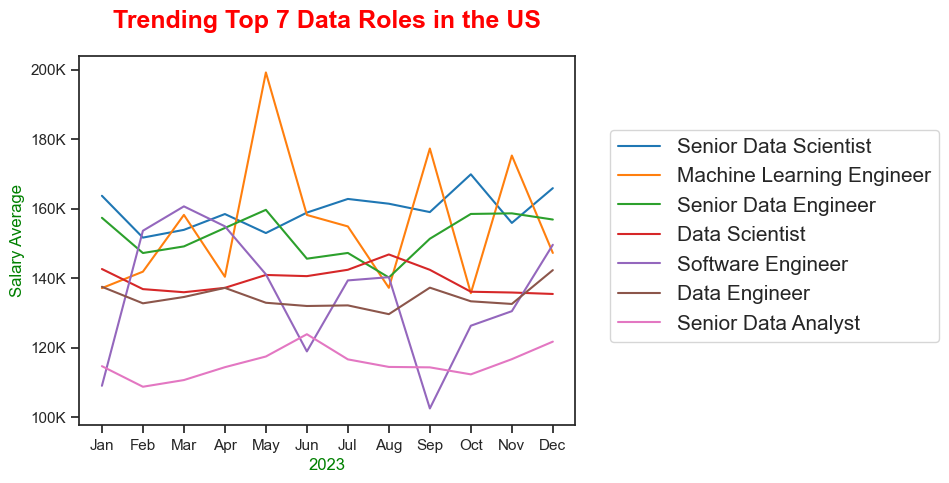

In [ ]:
import matplotlib.ticker as ticker

df_plot = df_US_pivot.iloc[:,:7]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')

plt.title('Trending Top 7 Data Roles in the US',fontsize=18, fontweight='bold', color='red', pad=20)
plt.ylabel('Salary Average', color='green')
plt.xlabel('2023', color='green')
plt.legend(bbox_to_anchor=(1.07, 0.8), loc='upper left', borderaxespad=0, fontsize =15)

# Change the yaxis unit in K
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()

# <span style="color:orange; font-weight:bold">Analysis</span>

### 1. Highest-Paid Roles
Machine Learning Engineer (orange line) has the highest volatility but also reached the highest salary point—nearly $200K in May. Despite fluctuations, it remains one of the top-paying roles throughout the year.  

Senior Data Scientist (blue line) consistently ranks among the top earners, staying within the $155K–$170K range.  

### 2. Stability vs Volatility
- Most Stable Salaries:

Data Engineer (brown line): Shows little fluctuation, staying within $130K–$140K.

Data Scientist (red line): Fairly stable, hovering around $140K–$145K.

- Most Volatile Salaries:

Machine Learning Engineer and Software Engineer (purple line): Both show significant monthly changes, indicating fluctuating demand or reporting inconsistencies.

Software Engineer saw a sharp dip in September (~$100K), but quickly recovered to $145K by December, which may indicate a seasonal hiring or market anomaly.

### 3. Lowest-Paid Role
Senior Data Analyst (pink line) has the lowest salary trend, staying within the $110K–$125K range across the year.